In [6]:
import sys
import random
import math
import numpy as np
import sklearn
import pandas as pd

import os 
from os import listdir, walk
from os.path import isfile, join

import sys
import matplotlib.pyplot as plt

import tensorflow as tf

In [7]:
def encode_gait_percentage(df, name):
  percent = df[name].values.tolist()
  x = np.zeros((len(df[name]),1))
  y = np.zeros((len(df[name]),1))
  for i in range (len(percent)): 
    phi = percent[i] * 2 * math.pi / 100
    x[i] = math.cos(phi)
    y[i] = math.sin(phi)
    
  df['x'] = x
  df['y'] = y

In [21]:
def shuffle_cycle(all_data):
    all_data.info()
    cycle = 0
    cycle_list = []

    start = 0

    for i in range(len(all_data) - 1):
        if (all_data['perc'][i+1] == 0):
            cycle += 1
            cycle_list.append(all_data.iloc[start:i])
            start = i + 1
    
    random.shuffle(cycle_list)
    source_table = pd.concat(cycle_list, axis=0, ignore_index=True)

    drop_list = ["lgrf","rgrf","l_ph_ank","r_ph_ank"]
    source_table = source_table.drop(drop_list, axis = 1)

    encode_gait_percentage(source_table, 'perc')

    return source_table
    

In [9]:
working_dir = os.getcwd()
sys_platform = sys.platform
excel_path_dict = {'linux' : "/csvs/", 'win32' : "\Data\Incline\\non-normal\\all subject\\"}
excel_path_name = excel_path_dict[sys_platform]

directory_path = working_dir
excel_path = directory_path + excel_path_name

In [10]:
excel_path

'c:\\Users\\Admin\\Desktop\\Neurorobotic Lab\\Data_Code\\Model\\Gait_Phase_Prediction\\Data\\Incline\\non-normal\\all subject\\'

In [11]:
all_file = []

for(dirpath, dirnames, filenames) in walk(excel_path):
    all_file.extend(filenames)
  

In [12]:
len(all_file)

59

In [13]:
all_subject_names = ['YC', 'TH','PH','SKS','VP','AK', 'SD','VN','JL','JS', 'PK', 'SOE']

In [90]:
name = 'SOE'
full_data = []

for i in all_file:
    subject =  i.split('_')[0]
    if not subject in name:
        continue
    else:
        print(i)
        full_data.append(pd.read_excel(excel_path + i, sheet_name="Sheet1"))

random.shuffle(full_data)
source_table = pd.concat(full_data, axis = 0, ignore_index = True)


SOE_I_0_new_.xlsx
SOE_I_2_new_.xlsx
SOE_I_3_new_.xlsx
SOE_I_4_new_.xlsx
SOE_I_5_new_.xlsx


In [91]:
source_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267135 entries, 0 to 267134
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   lcop          267135 non-null  float64
 1   rcop          267135 non-null  float64
 2   l_ph_ank      267135 non-null  float64
 3   l_ph_hip      267135 non-null  float64
 4   l_ph_fo       267135 non-null  float64
 5   r_ph_ank      267135 non-null  float64
 6   r_ph_hip      267135 non-null  float64
 7   r_ph_fo       267135 non-null  float64
 8   lgrf          267135 non-null  float64
 9   rgrf          267135 non-null  float64
 10  st_sw_phase   267135 non-null  int64  
 11  strike_frame  267135 non-null  int64  
 12  perc          267135 non-null  float64
 13  lhip_ang      267135 non-null  float64
 14  rhip_ang      267135 non-null  float64
 15  st_l          267135 non-null  float64
dtypes: float64(14), int64(2)
memory usage: 32.6 MB


In [92]:
source_table

,lcop,rcop,l_ph_ank,l_ph_hip,l_ph_fo,r_ph_ank,r_ph_hip,r_ph_fo,lgrf,rgrf,st_sw_phase,strike_frame,perc,lhip_ang,rhip_ang,st_l
0,0.000211,0.003087,296.740289,310.080341,263.811456,260.822771,229.493240,260.553179,0.105840,1.597759,1,3,0.833333,20.014759,-18.900179,0.000000
1,0.000246,0.003089,295.908578,308.465997,263.231038,260.251963,226.892933,259.412047,0.139863,1.585415,2,4,1.250000,19.773520,-19.121217,0.338303
2,0.000283,0.003090,295.090775,306.886893,262.600450,259.676542,223.798107,258.128115,0.177371,1.570330,3,5,1.666667,19.515440,-19.336422,0.334061
3,0.000321,0.003090,294.293975,305.354912,261.912929,259.100156,220.096609,256.673633,0.217664,1.552314,4,6,2.083333,19.240874,-19.542156,0.329540
4,0.000360,0.003087,293.524104,303.879195,261.160491,258.526007,215.653938,255.011165,0.260281,1.531179,5,7,2.500000,18.950467,-19.734588,0.324751
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267130,0.000040,0.003141,58.077753,322.063816,61.925901,226.889036,227.256363,0.049005,0.000000,1.810253,15,198,97.524752,27.930345,-18.252975,0.948603
267131,0.000059,0.003137,54.974581,322.133849,60.485328,225.069306,225.566064,0.047152,0.000000,1.816101,16,199,98.019802,27.709058,-18.441370,0.945187
267132,0.000082,0.003130,51.880227,322.321545,59.075589,223.338560,223.972156,0.045429,0.000000,1.817541,17,200,98.514851,27.511452,-18.607738,0.942131
267133,0.000108,0.003119,48.910765,322.590619,57.733926,221.740445,222.510424,0.043872,0.000000,1.814195,18,201,99.009901,27.339555,-18.751251,0.939468


In [93]:
source_table = shuffle_cycle(source_table)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267135 entries, 0 to 267134
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   lcop          267135 non-null  float64
 1   rcop          267135 non-null  float64
 2   l_ph_ank      267135 non-null  float64
 3   l_ph_hip      267135 non-null  float64
 4   l_ph_fo       267135 non-null  float64
 5   r_ph_ank      267135 non-null  float64
 6   r_ph_hip      267135 non-null  float64
 7   r_ph_fo       267135 non-null  float64
 8   lgrf          267135 non-null  float64
 9   rgrf          267135 non-null  float64
 10  st_sw_phase   267135 non-null  int64  
 11  strike_frame  267135 non-null  int64  
 12  perc          267135 non-null  float64
 13  lhip_ang      267135 non-null  float64
 14  rhip_ang      267135 non-null  float64
 15  st_l          267135 non-null  float64
dtypes: float64(14), int64(2)
memory usage: 32.6 MB


In [94]:
source_table

,lcop,rcop,l_ph_hip,l_ph_fo,r_ph_hip,r_ph_fo,st_sw_phase,strike_frame,perc,lhip_ang,rhip_ang,st_l,x,y
0,0.000329,0.003383,304.759523,265.630463,228.015630,1.838576,86,1,0.000000,20.601045,-19.268605,0.842870,1.000000,0.000000
1,0.000382,0.003382,304.787947,265.251081,224.739894,1.970966,87,2,0.440529,20.349401,-19.478380,0.838755,0.999617,0.027676
2,0.000439,0.003376,304.750178,264.800591,220.828814,2.091866,1,3,0.881057,20.101011,-19.671379,0.834687,0.998468,0.055330
3,0.000497,0.003365,304.632499,264.283408,216.128470,2.199525,2,4,1.321586,19.853747,-19.846169,0.830632,0.996554,0.082942
4,0.000556,0.003350,304.424345,263.700632,210.463532,2.292425,3,5,1.762115,19.605656,-20.001028,0.826556,0.993877,0.110491
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265738,-0.000028,0.003130,309.838892,260.743944,237.855014,1.860307,80,226,97.402597,26.129538,-16.203332,0.929042,0.986712,-0.162476
265739,-0.000026,0.003130,309.861065,261.872586,236.487918,1.935796,81,227,97.835498,25.829681,-16.456498,0.924338,0.990766,-0.135581
265740,-0.000024,0.003129,309.924634,262.684950,234.931012,2.002253,82,228,98.268398,25.540169,-16.699561,0.919784,0.994087,-0.108585
265741,-0.000019,0.003125,310.013126,263.231260,233.144512,2.058290,83,229,98.701299,25.260313,-16.931687,0.915372,0.996673,-0.081509


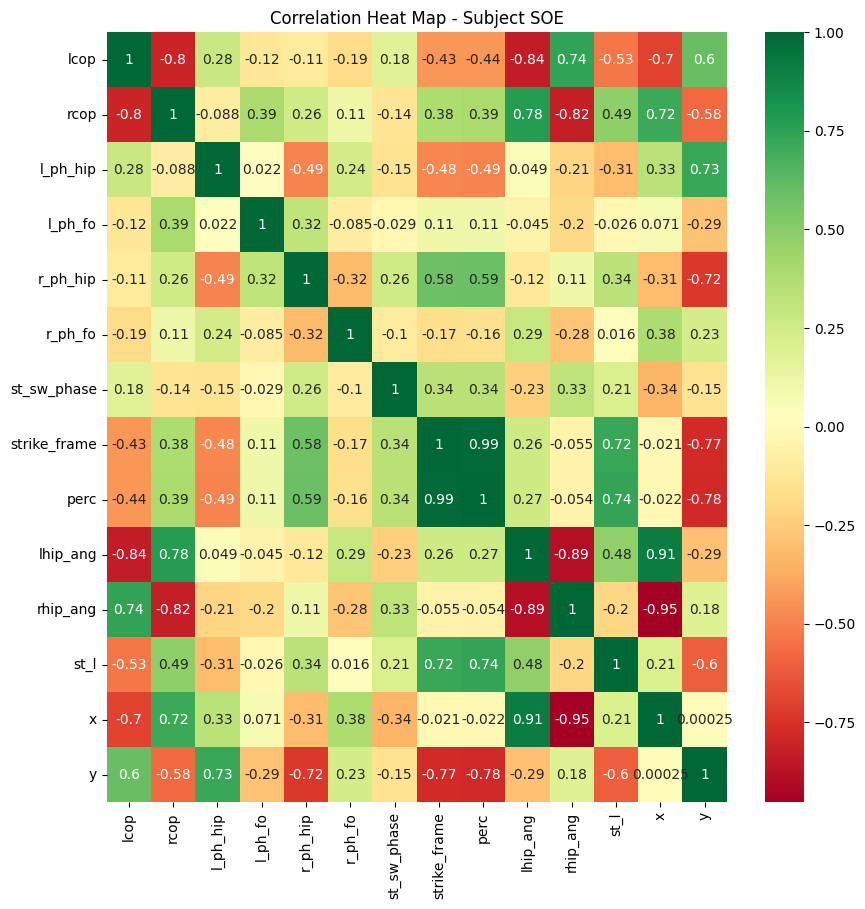

In [95]:
import seaborn as sns
corrmat = source_table.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
plt.title('Correlation Heat Map - Subject ' + name)
g=sns.heatmap(source_table[top_corr_features].corr(),annot=True,cmap="RdYlGn")